## LE dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cscc_db_v2.csv")
df.head()

,run,dmgfuncpar,climate,SSP,RCP,N,ISO3,prtp,eta,dr,16.7%,50%,83.3%
0,bhm_lr,bootstrap,expected,SSP1,rcp45,1000,AFG,1.0,0p7,NaN,0.909221,3.001487,4.753647
1,bhm_lr,bootstrap,expected,SSP1,rcp45,1000,AFG,1.0,1p5,NaN,0.104779,0.522717,1.251716
2,bhm_lr,bootstrap,expected,SSP1,rcp45,1000,AFG,2.0,0p7,NaN,0.468539,1.534879,2.381060
3,bhm_lr,bootstrap,expected,SSP1,rcp45,1000,AFG,2.0,1p5,NaN,0.068613,0.325439,0.723126
4,bhm_lr,bootstrap,expected,SSP1,rcp45,1000,AFG,NaN,NaN,3.0,2.232062,3.828149,4.235822


In [3]:
df['run'].unique()

array(['bhm_lr', 'bhm_richpoor_lr', 'bhm_richpoor_sr', 'bhm_sr',
       'djo_richpoor'], dtype=object)

In [4]:
print(
    f"""prtp : {df['prtp'].unique()}\n
eta : {df['eta'].unique()}"""
)

prtp : [ 1.  2. nan]

eta : ['0p7' '1p5' nan]


In [5]:
df['run'].unique()

array(['bhm_lr', 'bhm_richpoor_lr', 'bhm_richpoor_sr', 'bhm_sr',
       'djo_richpoor'], dtype=object)

## **BHM LR**

In [6]:
df1 = df[(df['dmgfuncpar'] == 'bootstrap') & (df['climate'] == 'uncertain') & 
        (df['prtp'] == np.nan) & (df['eta'] == np.nan) & (df['dr'] == 3.) & (df['run'] == 'bhm_lr')]
df1.head()

,run,dmgfuncpar,climate,SSP,RCP,N,ISO3,prtp,eta,dr,16.7%,50%,83.3%


In [7]:
df['dr'].unique()

array([nan,  3.,  5.])

In [8]:
group1 = df1.groupby('ISO3')[['16.7%', '50%', '83.3%']].median()
group1['country'] = group1.index
group1 = group1[['country', '16.7%', '50%', '83.3%']]
group1 = group1.reset_index(drop=True)
group1.head()

,country,16.7%,50%,83.3%


In [9]:
csc = group1[group1['country'] != 'WLD']
gscc = csc['50%'].sum()
gscc

0.0

In [10]:
print(csc.to_string())

Empty DataFrame
Columns: [country, 16.7%, 50%, 83.3%]
Index: []


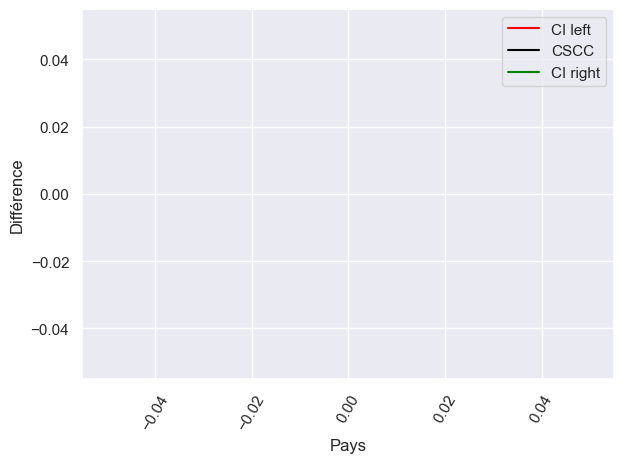

In [11]:
sns.set_theme(style='darkgrid')
plt.plot(csc.index, csc['16.7%'], color='red', label='CI left')
plt.plot(csc.index, csc['50%'], color='black', label='CSCC')
plt.plot(csc.index, csc['83.3%'], color='green', label='CI right')
plt.xlabel('Pays')
plt.ylabel('Différence')
plt.legend()
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [12]:
group2 = df1.groupby('ISO3')[['16.7%', '50%', '83.3%']].mean()
csc = group2[group2.index != 'WLD']
gscc = csc['50%'].sum()
gscc

0.0

## **BHM richpoor LR**

In [13]:
df2 = df[(df['dmgfuncpar'] == 'bootstrap') & 
         (df['climate'] == 'uncertain') & 
         (df['prtp'].isna()) & 
         (df['eta'].isna()) & 
         (df['dr'] == 3.) & 
         (df['run'].isin(['bhm_richpoor_lr']))]
df2.sample(n=30)

,run,dmgfuncpar,climate,SSP,RCP,N,ISO3,prtp,eta,dr,16.7%,50%,83.3%
72232,bhm_richpoor_lr,bootstrap,uncertain,SSP3,rcp60,209790,SLV,NaN,NaN,3.0,-0.668452,0.230887,0.421415
67672,bhm_richpoor_lr,bootstrap,uncertain,SSP2,rcp45,314685,ESP,NaN,NaN,3.0,-5.548636,4.519685,8.314250
74080,bhm_richpoor_lr,bootstrap,uncertain,SSP4,rcp45,314685,MKD,NaN,NaN,3.0,-0.154287,0.128969,0.230795
68164,bhm_richpoor_lr,bootstrap,uncertain,SSP2,rcp45,314685,SOM,NaN,NaN,3.0,-0.028812,0.053759,0.075952
72424,bhm_richpoor_lr,bootstrap,uncertain,SSP3,rcp85,253470,ISL,NaN,NaN,3.0,-0.143048,0.029432,0.062400
70438,bhm_richpoor_lr,bootstrap,uncertain,SSP3,rcp45,299700,MUS,NaN,NaN,3.0,-0.200409,0.075286,0.165926
78292,bhm_richpoor_lr,bootstrap,uncertain,SSP5,rcp60,209790,PRY,NaN,NaN,3.0,-2.755632,0.947170,1.654060
64588,bhm_richpoor_lr,bootstrap,uncertain,SSP1,rcp45,314685,DZA,NaN,NaN,3.0,-4.550889,2.687732,4.738643
65656,bhm_richpoor_lr,bootstrap,uncertain,SSP1,rcp60,209790,GBR,NaN,NaN,3.0,-8.934102,8.283379,15.964519
69486,bhm_richpoor_lr,bootstrap,uncertain,SSP2,rcp85,343275,AGO,NaN,NaN,3.0,-9.773109,1.348260,1.851069


    ISO3                                                50%
86   LAO  [0.7682388997333547, 0.1988687774001813, 0.405...
134  SLB  [0.0602629219186492, 0.0125283968320429, 0.031...
13   BGD  [10.945971350146015, 2.0912494063331177, 5.851...
68   HUN  [2.997165184157335, 1.8691704873375496, 1.4881...
28   CHN  [280.86199406489453, 123.68990524753012, 152.0...


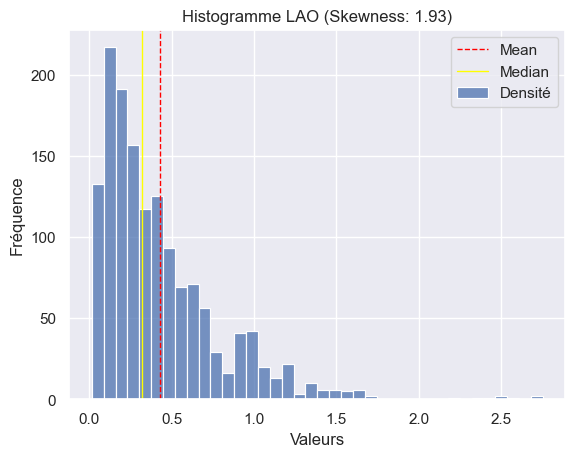

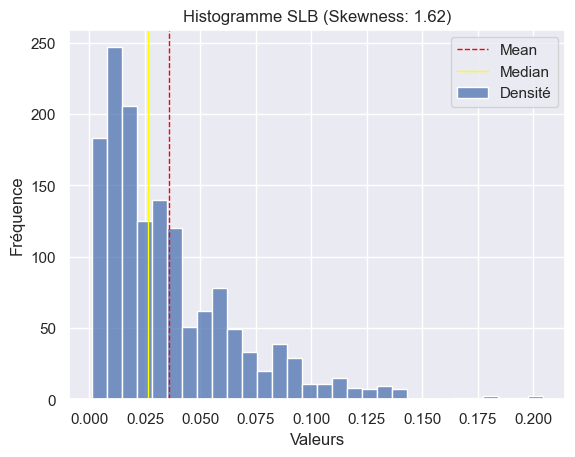

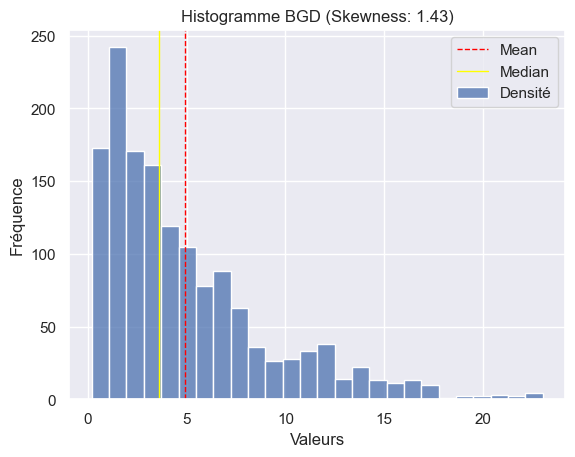

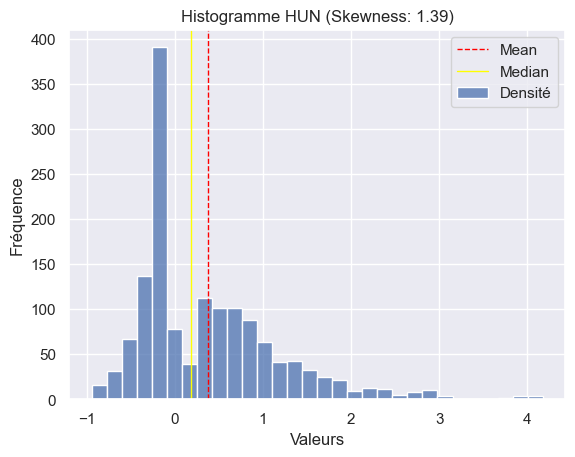

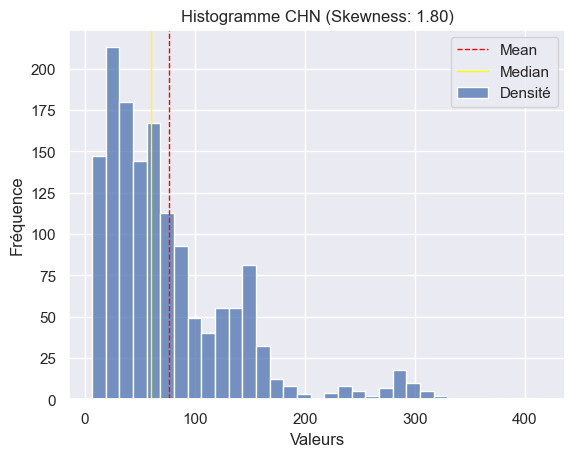

In [14]:
country_values = df.groupby('ISO3')['50%'].apply(list).reset_index()
country_values.head()

random_countries = country_values.sample(n=5)
print(random_countries)

for index, row in random_countries.iterrows():
    plt.figure()
    sns.histplot(row['50%'], label='Densité')
    plt.axvline(np.mean(row['50%']), color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(np.median(row['50%']), color='yellow', linestyle='-', linewidth=1, label='Median')
    skewness = pd.Series(row['50%']).skew()
    plt.xlabel('Valeurs')
    plt.ylabel('Fréquence')
    plt.legend()
    plt.title(f'Histogramme {row["ISO3"]} (Skewness: {skewness:.2f})')
    plt.show()

In [15]:
group = df2.groupby('ISO3')[['16.7%', '50%', '83.3%']].median()
group['country'] = group.index
group = group[['country', '16.7%', '50%', '83.3%']]
group = group.reset_index(drop=True)
group.rename(columns={'50%':'median'}, inplace=True)
csc = group[group['country'] != 'WLD']
gscc = csc['median'].sum()
gscc

573.8009845669417

In [16]:
csc.head()

,country,16.7%,median,83.3%
0,AFG,0.209844,1.399681,3.316064
1,AGO,-7.942651,1.780926,2.716581
2,ALB,-0.154960,0.119903,0.203842
3,ARE,-17.594904,2.955779,5.284282
4,ARG,-4.354172,3.325263,6.256226


In [20]:
mean_X = csc['median'].mean()

# Calcul de l'erreur standard de la moyenne
z_alpha_2 = 1.96  # pour un intervalle de confiance à 95%

# Calcul de l'écart-type
std_X = csc['median'].std()

# Calcul de la somme
sum_X = csc['median'].sum()

# Calcul de l'erreur standard de la somme
n = len(csc)

# Calcul de l'écart-type de la somme
SE_sum = std_X * (n ** 0.5)

# Affichage des résultats
print(f"Moyenne : {mean_X}")
print(f"Écart-type : {std_X}")
print(f"Somme : {sum_X}")
print(f"SE de la Somme : {SE_sum}")

Moyenne : 3.3952720980292406
Écart-type : 11.128393245264698
Somme : 573.8009845669417
SE de la Somme : 144.6691121884411


In [21]:
mscc = csc['16.7%'].sum()
mscc

-1670.3990761954935

In [22]:
nscc = csc['83.3%'].sum()
nscc

968.6745015970029

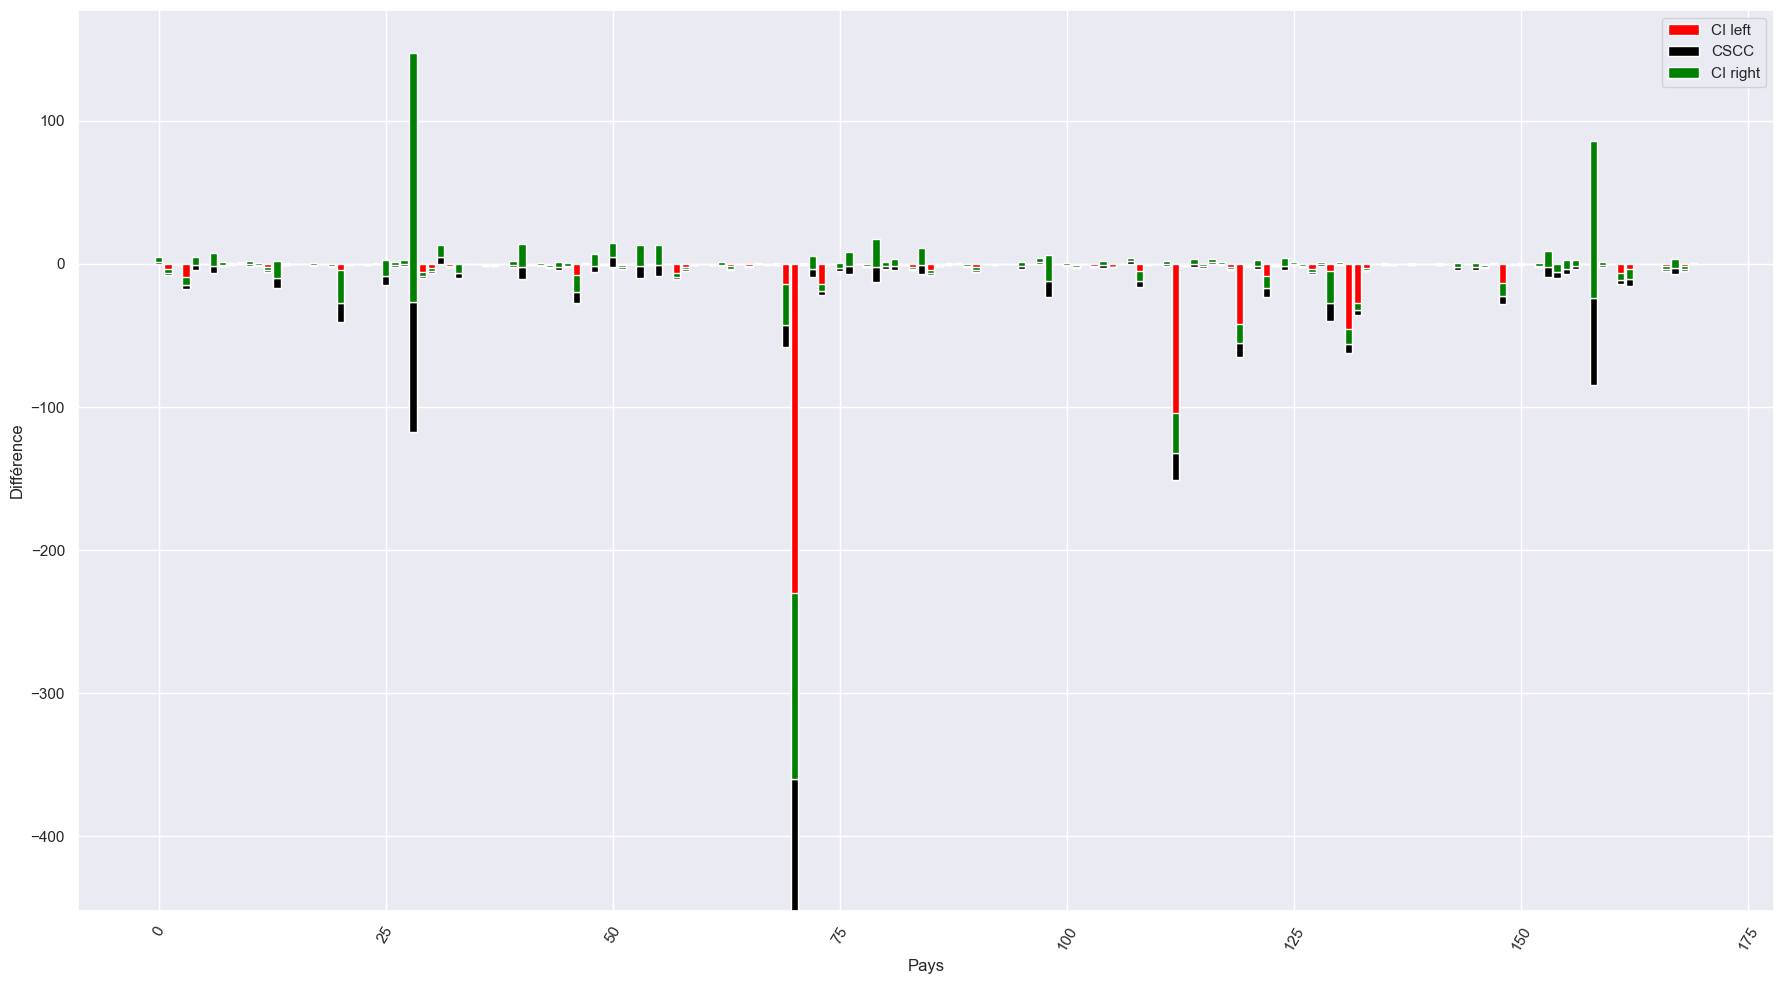

In [22]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(18, 10))
plt.bar(csc.index, csc['16.7%'], color='red', label='CI left')
plt.bar(csc.index, csc['median'], bottom=csc['16.7%'], color='black', label='CSCC')
plt.bar(csc.index, csc['83.3%'], bottom=csc['16.7%'] + csc['median'], color='green', label='CI right')
plt.xlabel('Pays')
plt.ylabel('Différence')
plt.legend()
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [23]:
g_mean = df2.groupby('ISO3')[['16.7%', '50%', '83.3%']].mean()
g_mean['country'] = g_mean.index
g_mean = g_mean[['country', '16.7%', '50%', '83.3%']]
g_mean = g_mean.reset_index(drop=True)
g_mean.rename(columns={'50%':'median'}, inplace=True)
csc = g_mean[g_mean.index != 'WLD']
gscc = csc['median'].sum()
# gscc

In [76]:
bf = group[group['country'] != 'WLD']
gscc_sum = bf['median'].sum()
bf['SEM'] = (bf['83.3%'] - bf['16.7%']) / 2
total_sem = (bf['SEM']**2).sum()**0.5
std = (bf['83.3%'] - bf['16.7%']).std()
gscc_sum, total_sem, std

C:\Users\aurel\AppData\Local\Temp\ipykernel_77732\1466379610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bf['SEM'] = (bf['83.3%'] - bf['16.7%']) / 2


(573.8009845669417, 367.5225920346357, 54.504266144754205)

In [23]:
group.to_csv('country_level_gscc.csv', index=False)
print('done !')

done !
